# Homework #2 - Linear Regeression
Cory Randolph

6/24/2022

CMPE 257

# Linear Regression

## 1 Explain how a linear regression algorithm trains in your own words

We use linear regression as a way to take some input variable and plug it into a linear equation ($y = mx + b$) to estimate the output variable. To train/fit a linear model we draw a line through all of the points and then find the error or distance between the points and out plotted line. Then we can move/rotate this line until we get a line that has the lowest amount of total error an is the bet fit.

## 2 Load the sklearn boston dataset

Import the needed packages

In [79]:
import pandas as pd
import numpy as np
import sklearn

Load the boston data set into a pands DataFrame (Changed to California dataset since Boston has been depricated)

In [80]:
"""Note you used to be able to import this directly but it has been depricated"""
# # Import data from sklearn
# boston_data = sklearn.datasets.load_boston()

# # Convert data into a dataframe
# df = pd.DataFrame(
#     data = boston_data,
#     columns = boston_data.feature_names
# )

'Note you used to be able to import this directly but it has been depricated'

In [81]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

# Show the various information included in the dataset
housing.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [82]:
df = pd.DataFrame(data = housing["data"], columns = housing["feature_names"])

# Add in the sales price/target column
df["SalePrice"] = housing["target"]

Display the first few wors of data to confirm it was loaded correctly

In [ ]:
df.columns#.to_list()

Clean the data slightly for the simplisity of this exercise I will drop the catetegorical vaiables and only focus on the numerical onces. (We could use one-hot encoding or other options if needed)

In [84]:
df = df.select_dtypes([np.number])

Drop the Id column since it does not help with training

In [85]:
df.drop(['Id'], axis = 1, inplace = True)

Drop Data with missing values


In [ ]:
df.shape

In [77]:
df = df.dropna().reset_index()

In [78]:
df.shape

TypeError: ignored

## 3 Visualize the dataset using graphs

Fist display some overall data stats

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

In [38]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Visualise varios aspects of the graph

In [39]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Show histograms for all quantative variables

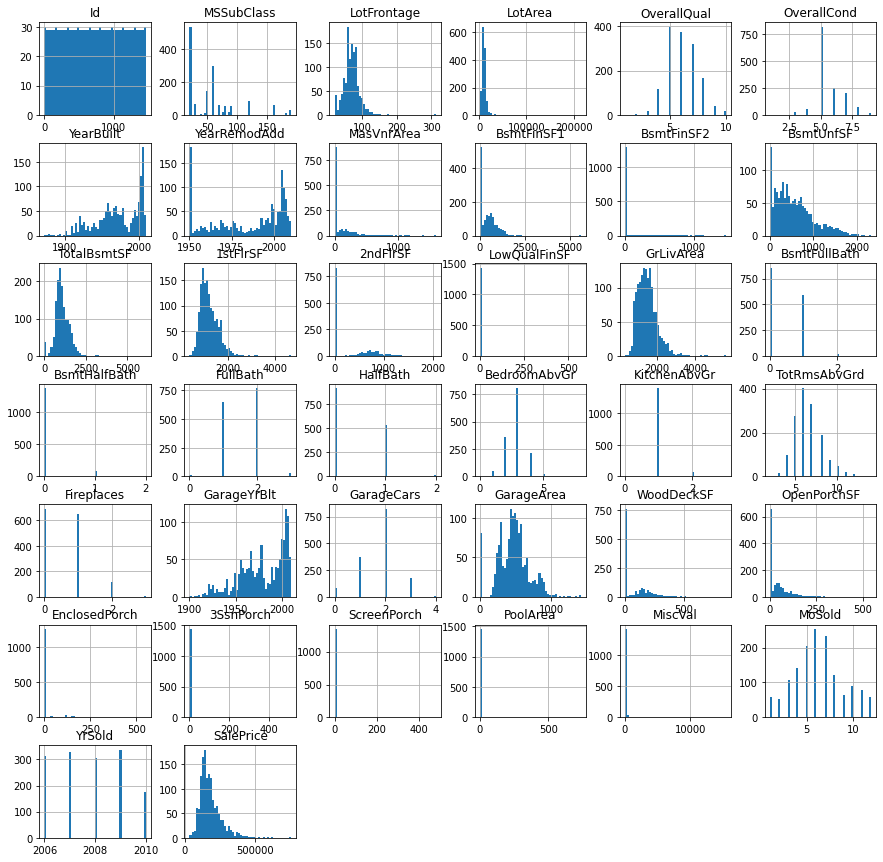

In [40]:
df.hist(bins=50, figsize=(15, 15));

Create a seaboarn plot to better show the Sale Price (Target Variable)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


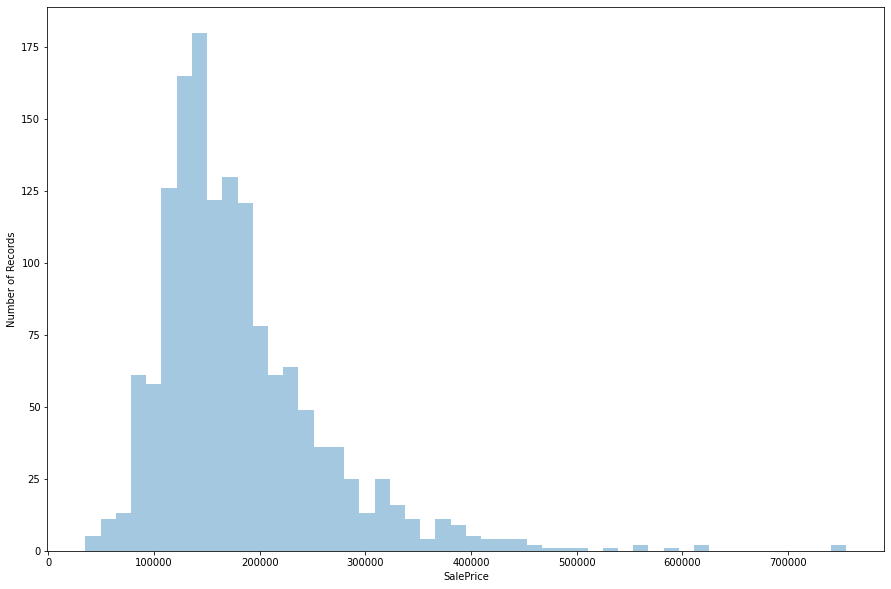

In [41]:
plt.figure(figsize = (15,10))
plt.xlabel('House Sale Price')
plt.ylabel('Number of Records')
sns.distplot(df['SalePrice'], bins=50,kde=False)
plt.show()

Create a few scatter plots for variables vs Sale Price to see if there are any obvious correlations.

<Figure size 1080x720 with 0 Axes>

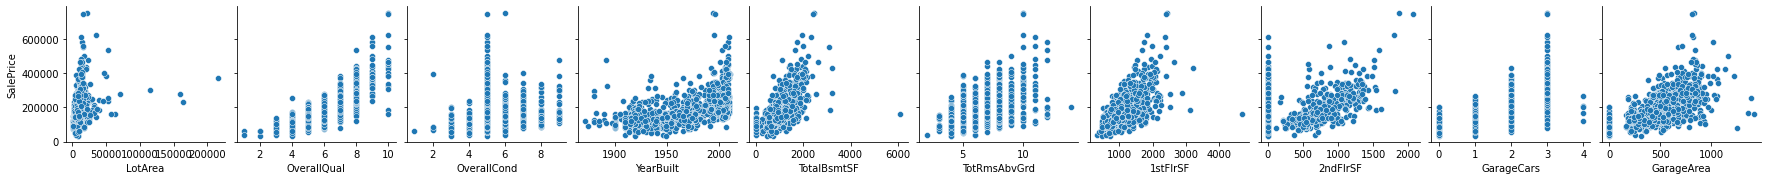

In [43]:
plt.figure(figsize = (15,10))
sns.pairplot(data = df, x_vars=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'TotRmsAbvGrd', '1stFlrSF', '2ndFlrSF', 'GarageCars', 'GarageArea'],y_vars ='SalePrice') #,hue = 'SaleType');

The above graph shows a lot of infomration and one interesting thing that shows up is that the sale type of "New" has a higher Sale Price that the WD. Which makes intuitive sense but is nice to see in the data.

Secondly, many of these features have a seemingly positive correlation with the Sales Price which means they should have some strong predictive power when creating a linear model.

Digging into the Overall Quality factor should be interesting since it has one of the clearest correlations.

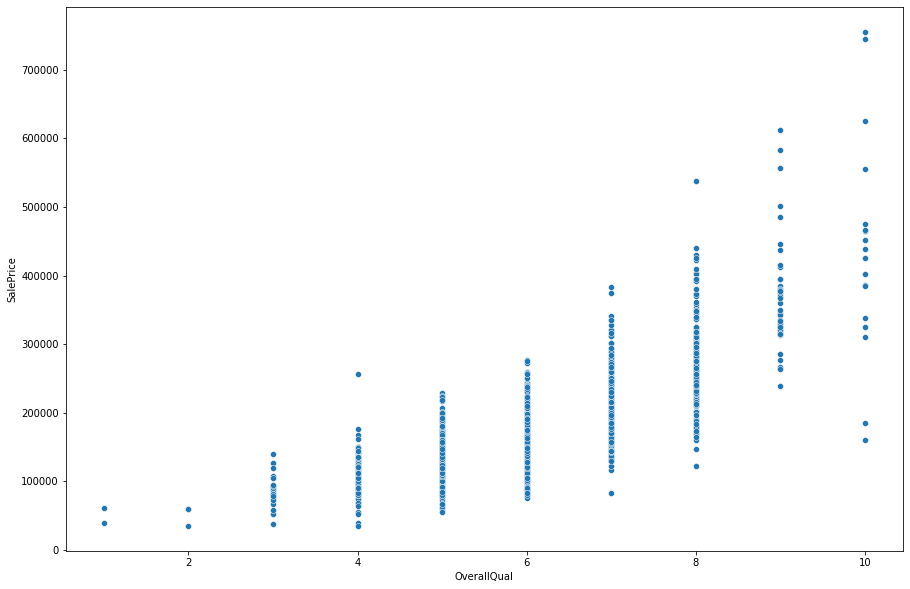

In [55]:
plt.figure(figsize = (15,10))
sns.scatterplot(data=df, x="OverallQual", y="SalePrice")#, hue="SaleType");

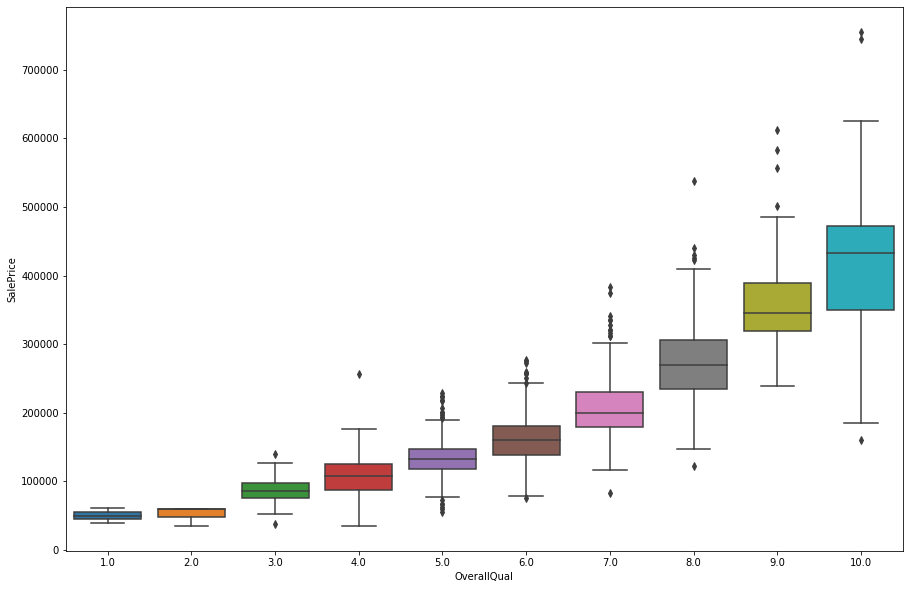

In [56]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df, x = 'OverallQual', y = 'SalePrice');

## 4 Calculate the pearson correlation matrix of the data

Use the built in pandas correlation calculation for a dataframe and then plot it with seaborn.

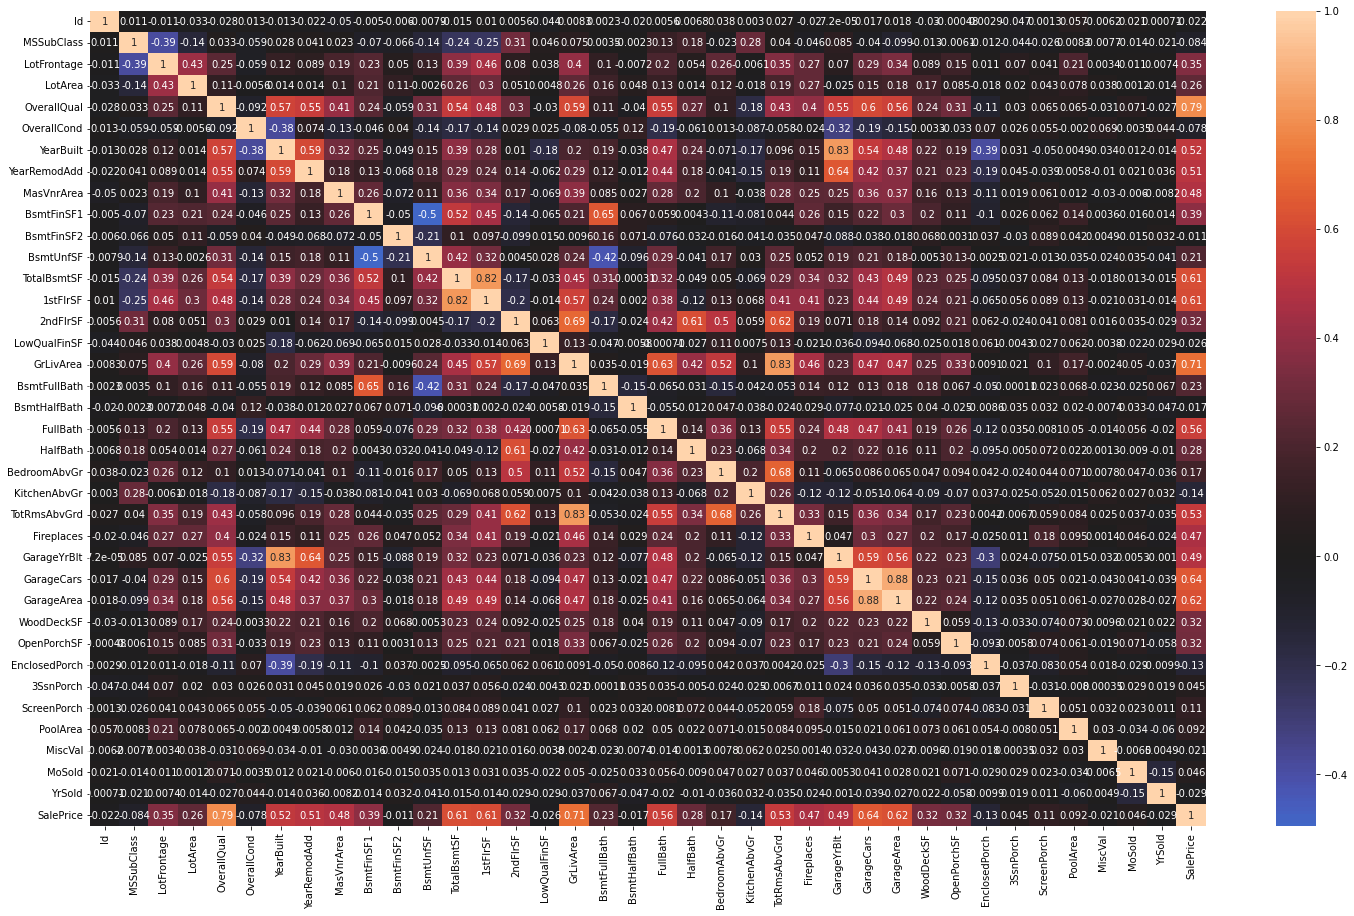

In [57]:
plt.figure(figsize = (25,15))
sns.heatmap(df.corr(),annot=True,center=0 );

## 5 Select features which are more related to the target variable using graphs and the correlation matrix, are the both indicating the same features? (MEDV is the target variable)

Based on the graphs and the correlation matrix/plot, some promosing features are:

* LotArea
* OverallQual
* OverallCond
* YearBuilt
* TotalBsmtSF
* TotRmsAbvGrd
* 1stFlrSF
* 2ndFlrSF
* GarageCars
* GarageArea
* GrLivArea



## 6 Compare correlation of feature between themselves and if two features are highly correlated remove one of them (the one with lesser correlation with the target variable) 

To narrow this down a little more lets re-calculate the correlation with only the selected features.

In [58]:
df.columns


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [59]:
df_reduced = df.copy()

df_reduced = df_reduced[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
                         'YearRemodAdd', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea',
                         '1stFlrSF', '2ndFlrSF', 'GarageCars', 'GarageArea', 
                         'SalePrice']]
df_reduced.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotRmsAbvGrd,GrLivArea,1stFlrSF,2ndFlrSF,GarageCars,GarageArea,SalePrice
0,8450.0,7.0,5.0,2003.0,2003.0,856.0,8.0,1710.0,856.0,854.0,2.0,548.0,208500.0
1,9600.0,6.0,8.0,1976.0,1976.0,1262.0,6.0,1262.0,1262.0,0.0,2.0,460.0,181500.0
2,11250.0,7.0,5.0,2001.0,2002.0,920.0,6.0,1786.0,920.0,866.0,2.0,608.0,223500.0
3,9550.0,7.0,5.0,1915.0,1970.0,756.0,7.0,1717.0,961.0,756.0,3.0,642.0,140000.0
4,14260.0,8.0,5.0,2000.0,2000.0,1145.0,9.0,2198.0,1145.0,1053.0,3.0,836.0,250000.0


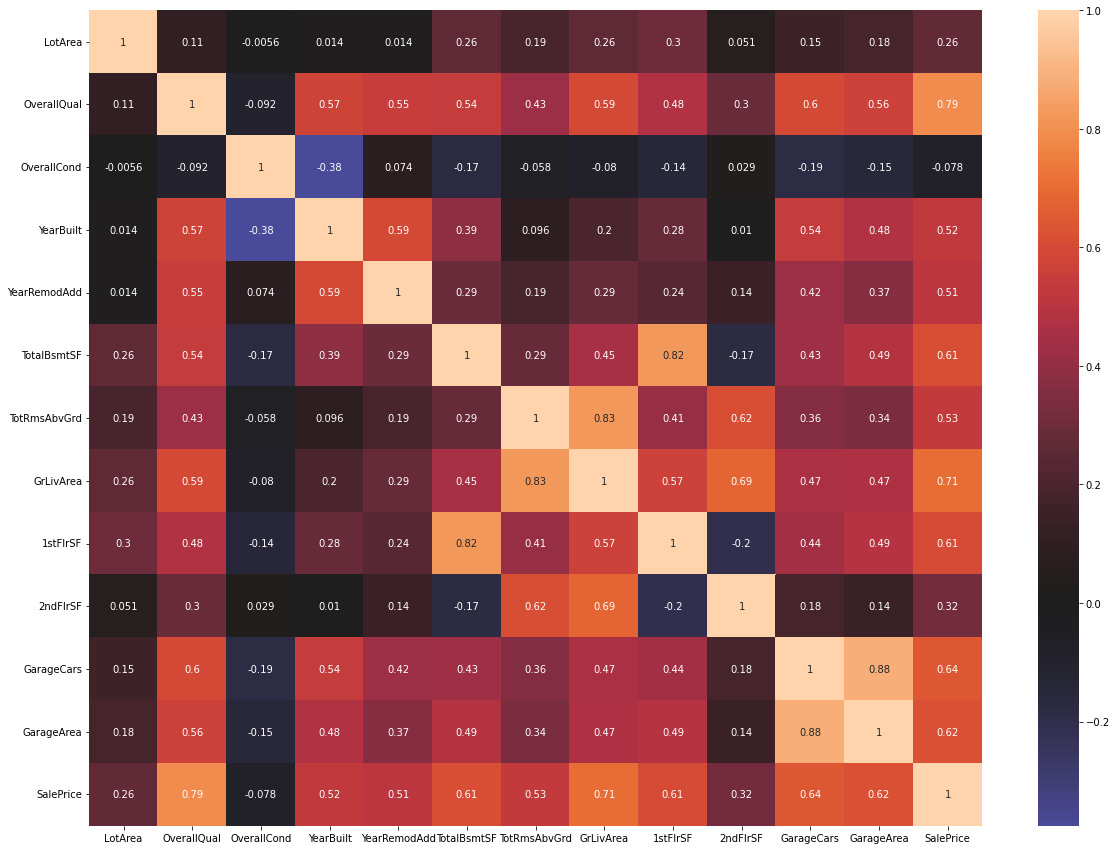

In [60]:
plt.figure(figsize = (20,15))
sns.heatmap(df_reduced.corr(),annot=True,center=0 );

Based on the correlation matrix above there are several features that seem highly correlated and should be removed.

* YearBuild vs YearRemodAdd
* TotRmsAbvGrd vs GrLivArea
* GarageCars vs GarageArea

In [61]:
df_reduced_corr_features = df_reduced.copy()

df_reduced_corr_features.drop(columns = ["YearRemodAdd", "TotRmsAbvGrd", "GarageCars"],
                              axis = 1, inplace = True)

df_reduced_corr_features.head()

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,1stFlrSF,2ndFlrSF,GarageArea,SalePrice
0,8450.0,7.0,5.0,2003.0,856.0,1710.0,856.0,854.0,548.0,208500.0
1,9600.0,6.0,8.0,1976.0,1262.0,1262.0,1262.0,0.0,460.0,181500.0
2,11250.0,7.0,5.0,2001.0,920.0,1786.0,920.0,866.0,608.0,223500.0
3,9550.0,7.0,5.0,1915.0,756.0,1717.0,961.0,756.0,642.0,140000.0
4,14260.0,8.0,5.0,2000.0,1145.0,2198.0,1145.0,1053.0,836.0,250000.0


## 7 perform the following steps 3 times, 1 with the entire dataset, 1 with the selected features from step 5 and 1 with the selected features from step 6 

## NOTE: FEATURE SELECTION IS USUALLY REQUIRED ONLY WHEN THERE ARE 100s TO 1000s OF FEATURES OR MORE, BUT HERE FOR EDUCATIONAL PURPOSES WE ARE PRACTICING FEATURE SELECTION ON A SMALLER DATASET

## 8 Split into train and test

### 8.1 Full Data


Split the data into 80% train and 20 % test


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(pd.DataFrame(df.drop(['SalePrice'], axis = 1)), 
                                                    df["SalePrice"],
                                                    test_size = 0.20,
                                                    random_state = 3)


## 9 Normalize the data

### 9.1 Full Data

Normalize the input data by applying a min-max scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_full =  MinMaxScaler()
scaler_full.fit(X_train_full)
X_train_scaled_full = scaler_full.transform(X_train_full)


## 10 Train the model and perform hyper parameter tuning using cross validation

In [70]:
from sklearn.linear_model import LinearRegression

### 10.1 Full Data

In [73]:
# Create the instance of the linear model
model_full = LinearRegression()

# Fit the model with the scalled data
y_train_pred = model_full.fit(X_train_scaled_full, y_train_full)


ValueError: ignored

## 11 Test the model on test set

# Reference

“Properties of Matrix Multiplication (Article).” Khan Academy, Khan Academy, https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:matrices/x9e81a4f98389efdf:properties-of-matrix-multiplication/a/properties-of-matrix-multiplication. 

Published by Thom Ives on November 1, and Thom Ives. “Simple Matrix Inversion in Pure Python without Numpy or Scipy.” Integrated Machine Learning and Artificial Intelligence, 1 Nov. 2018, https://integratedmlai.com/matrixinverse/. 


“Statistical Data Visualization.” Seaborn, https://seaborn.pydata.org/index.html. 